# Writing Dataframes to Excel

This is a demonstration of writing Pandas Dataframes back into an Excel native workbook using openpyxl.

1. Grab a generated CSV file
2. Create a dataframe from the file
3. Create a new Excel Workbook
4. Grab the active Sheet
5. Write our rows into the Sheet
6. Save the file

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Import openpyxl, Pandas and Numpy

We will use these libraries to handle our data

In [1]:
from openpyxl.utils.dataframe import dataframe_to_rows

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Read in our generated data

Checkout the `mimesis` library for generating different kinds of data. Easy way to dummy up data sets for things like names and addresses.

In [4]:
games = pd.read_csv('games.csv')

In [7]:
games

,Title,Platform,Rating,High Score
0,Motocross Madness,PlayStation Vita,PEGI 12,4.2
1,Ms. Pac-Man,Nintendo Switch,PEGI 7,2.4
2,Super Mega Baseball,Nintendo Switch,PEGI 16,9.6
3,Crimson Dragon,Nintendo 64,PEGI 3,2.0
4,Retro/Grade,Xbox One S,PEGI 16,5.3
5,The Elder Scrolls V: Skyrim,Nintendo 64,PEGI 12,1.4
6,Funky Smugglers,Xbox One S,PEGI 12,9.4
7,Gray Matter,PlayStation Vita,PEGI 7,4.2
8,Mass Effect 2,PlayStation 4,PEGI 12,6.4
9,Persona 4 Golden,Nintendo 64,PEGI 16,3.7


In [8]:
ratings = games['Rating']

In [9]:
ratings

0     PEGI 12
1      PEGI 7
2     PEGI 16
3      PEGI 3
4     PEGI 16
5     PEGI 12
6     PEGI 12
7      PEGI 7
8     PEGI 12
9     PEGI 16
10    PEGI 12
11     PEGI 7
12    PEGI 12
13    PEGI 18
14     PEGI 7
15    PEGI 18
16     PEGI 3
17     PEGI 7
18    PEGI 18
19     PEGI 3
20    PEGI 16
21     PEGI 3
22    PEGI 18
23    PEGI 12
24    PEGI 16
25    PEGI 12
26    PEGI 12
27     PEGI 7
28    PEGI 18
29    PEGI 18
       ...   
70    PEGI 16
71    PEGI 18
72    PEGI 18
73    PEGI 18
74    PEGI 16
75     PEGI 3
76     PEGI 7
77    PEGI 16
78     PEGI 7
79    PEGI 16
80    PEGI 18
81     PEGI 3
82    PEGI 18
83    PEGI 16
84     PEGI 7
85    PEGI 16
86     PEGI 7
87    PEGI 18
88    PEGI 18
89    PEGI 12
90    PEGI 12
91    PEGI 12
92    PEGI 16
93    PEGI 18
94    PEGI 18
95    PEGI 18
96    PEGI 12
97    PEGI 16
98    PEGI 18
99    PEGI 12
Name: Rating, Length: 100, dtype: object

In [10]:
ratings.value_counts()

PEGI 18    24
PEGI 16    21
PEGI 12    20
PEGI 7     18
PEGI 3     17
Name: Rating, dtype: int64

## Throw in a fun graph!

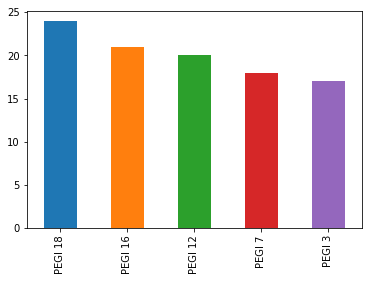

In [12]:
ratings.value_counts().plot(kind='bar')

## Now save our data into Excel

`openpyxl` allows us to interact with **real** Excel workbooks and put in formulas and conditional formatting just like we were using the tool directly.

In [13]:
from openpyxl import Workbook
wb = Workbook()
ws = wb.active

In [14]:
for r in dataframe_to_rows(games, index=True, header=True):
    ws.append(r)
 
wb.save('pandas_openpyxl.xlsx')